In [12]:
import os
import pandas as pd

In [13]:
os.chdir('D:/trunz/Documents/DataScience/R_visualization/Data-Visualization_Teamwork')
# 使用相对于根目录的路径 
dataframes=[] 
for i in range(2014,2024): 
    file_path = 'output_data/by_district/AQI/Beijing_AirQuality_'+str(i)+'AQI_days.csv'
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [14]:
# 合并数据，添加年份信息   
combined_df = pd.concat(    
    [df.assign(year=year) for year, df in zip(range(2014, 2024), dataframes)],
    ignore_index=True
)
df=combined_df 

In [15]:
# 计算每年的平均 AQI
df['mean_aqi'] = df.iloc[:, 1:-1].mean(axis=1)  # 除去 date 和 year 列
yearly_mean_aqi = df.groupby('year')['mean_aqi'].mean()
data0=df
data0

,date,东城区,西城区,朝阳区,海淀区,丰台区,石景山区,房山区,大兴区,通州区,顺义区,昌平区,门头沟区,平谷区,怀柔区,密云区,延庆区,year,mean_aqi
0,20140101,88.197917,90.625000,105.333333,78.875000,101.736111,81.000000,143.500000,134.708333,119.875000,81.604167,82.812500,18.000000,96.000000,74.166667,73.895833,94.458333,2014,91.549262
1,20140102,118.354167,112.277778,128.236111,104.048611,127.777778,92.833333,184.270833,175.902778,164.791667,86.645833,94.895833,18.000000,97.125000,84.958333,78.375000,79.729167,2014,109.263889
2,20140103,127.979167,123.263889,146.125000,119.527778,133.097222,104.166667,169.250000,166.861111,184.291667,99.812500,109.166667,18.000000,134.500000,113.395833,92.541667,86.729167,2014,120.544271
3,20140104,105.812500,103.611111,102.916667,104.569444,122.722222,115.375000,148.229167,120.236111,110.645833,70.729167,86.270833,18.000000,70.708333,85.750000,70.812500,92.541667,2014,95.558160
4,20140105,172.614583,157.805556,187.430556,165.027778,173.569444,164.208333,229.083333,218.055556,218.875000,134.645833,128.479167,18.000000,138.708333,166.833333,144.666667,135.291667,2014,159.580946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,20231227,41.416667,47.416667,45.208333,44.520833,46.166667,48.791667,39.270833,48.243056,45.958333,47.791667,39.645833,45.916667,44.291667,34.770833,35.354167,41.791667,2023,43.534722
3439,20231228,68.687500,68.291667,67.895833,70.833333,68.145833,69.604167,59.770833,71.656250,61.770833,55.083333,68.937500,69.541667,52.229167,48.583333,40.041667,77.729167,2023,63.675130
3440,20231229,153.562500,153.729167,135.145833,124.312500,143.916667,132.541667,142.666667,195.062500,160.812500,96.750000,85.479167,106.375000,111.687500,65.791667,63.458333,113.520833,2023,124.050781
3441,20231230,206.812500,209.687500,187.125000,174.770833,179.312500,182.020833,183.979167,240.059028,187.437500,130.270833,99.791667,120.958333,161.562500,93.750000,87.375000,121.437500,2023,160.396918


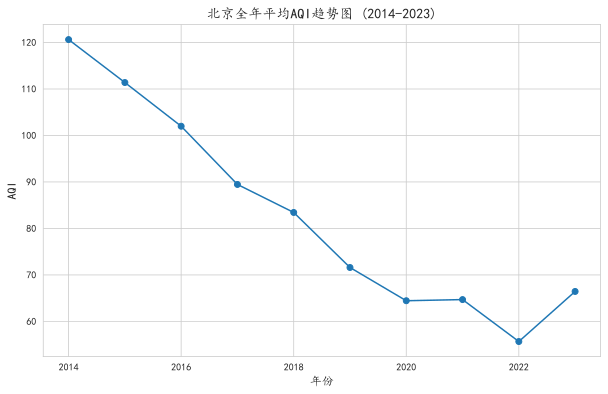

In [16]:
# 可视化
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean_aqi.index, yearly_mean_aqi.values, marker='o', linestyle='-')
plt.title('北京全年平均AQI趋势图 (2014-2023)', fontsize=14)
plt.xlabel('年份', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True)
plt.savefig('北京全年平均AQI趋势图 (2014-2023)', dpi=1080)
plt.show()

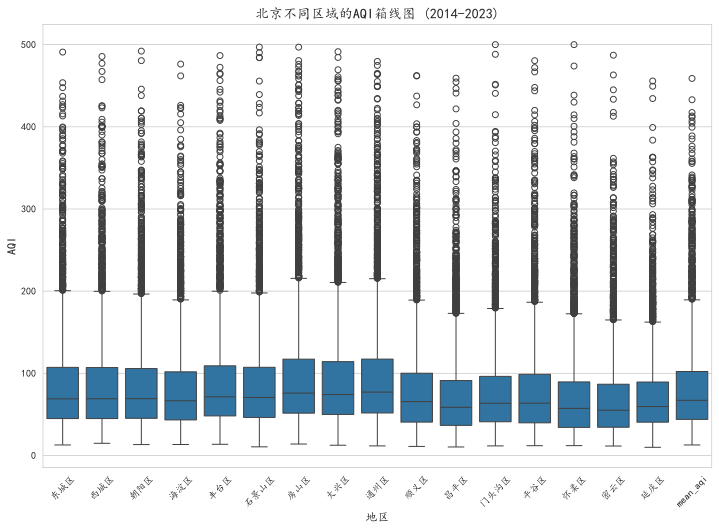

In [17]:
import seaborn as sns

# 转换为长表格式
long_df = df.melt(id_vars=['date', 'year'], var_name='district', value_name='AQI')   

# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(data=long_df, x='district', y='AQI')
plt.title('北京不同区域的AQI箱线图 (2014-2023)', fontsize=14)
plt.xlabel('地区', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('北京不同区域的AQI箱线图 (2014-2023)', dpi=1080)
plt.show()

C:\Users\trunz\AppData\Local\Temp\ipykernel_24304\1633032193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_aqi.index, y=seasonal_aqi.values, palette='viridis')


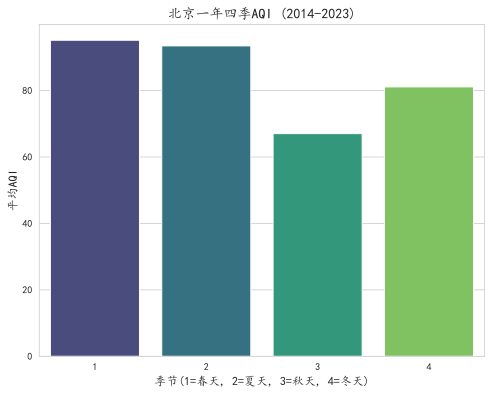

In [18]:
# 添加月份和季度列
df['month'] = df['date'].astype(str).str[4:6].astype(int)
df['season'] = df['month'] % 12 // 3 + 1  # 1:春, 2:夏, 3:秋, 4:冬

# 按季度计算全市平均 AQI
seasonal_aqi = df.groupby('season')['mean_aqi'].mean()

# 可视化
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_aqi.index, y=seasonal_aqi.values, palette='viridis')
plt.title('北京一年四季AQI (2014-2023)', fontsize=14)
plt.xlabel('季节(1=春天, 2=夏天, 3=秋天, 4=冬天)', fontsize=12)
plt.ylabel('平均AQI', fontsize=12)
plt.savefig('北京一年四季AQI (2014-2023)', dpi=1080)
plt.show()


C:\Users\trunz\AppData\Local\Temp\ipykernel_24304\1983137391.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heavy_pollution_count.index, y=heavy_pollution_count.values, palette='Set3')


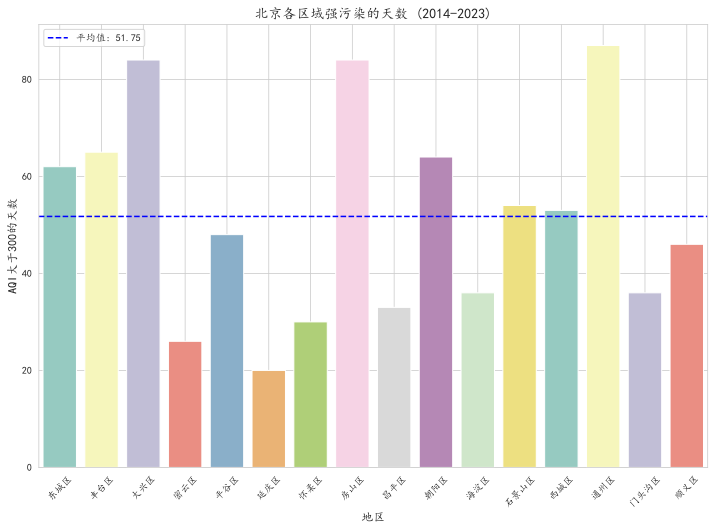

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define heavily polluted days
long_df['is_heavily_polluted'] = long_df['AQI'] > 300
long_df = long_df[long_df['district'] != 'mean_aqi']

# Count heavily polluted days per district
heavy_pollution_count = long_df.groupby('district')['is_heavily_polluted'].sum()

# Calculate the mean value
mean_aqi_value = heavy_pollution_count.mean()

# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=heavy_pollution_count.index, y=heavy_pollution_count.values, palette='Set3')
plt.axhline(y=mean_aqi_value, color='blue', linestyle='--', label=f'平均值: {mean_aqi_value:.2f}')
plt.title('北京各区域强污染的天数 (2014-2023)', fontsize=14)
plt.xlabel('地区', fontsize=12)
plt.ylabel('AQI大于300的天数', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('北京各区域强污染的天数 (2014-2023)', dpi=1080)
plt.show()

In [20]:
data0

,date,东城区,西城区,朝阳区,海淀区,丰台区,石景山区,房山区,大兴区,通州区,...,昌平区,门头沟区,平谷区,怀柔区,密云区,延庆区,year,mean_aqi,month,season
0,20140101,88.197917,90.625000,105.333333,78.875000,101.736111,81.000000,143.500000,134.708333,119.875000,...,82.812500,18.000000,96.000000,74.166667,73.895833,94.458333,2014,91.549262,1,1
1,20140102,118.354167,112.277778,128.236111,104.048611,127.777778,92.833333,184.270833,175.902778,164.791667,...,94.895833,18.000000,97.125000,84.958333,78.375000,79.729167,2014,109.263889,1,1
2,20140103,127.979167,123.263889,146.125000,119.527778,133.097222,104.166667,169.250000,166.861111,184.291667,...,109.166667,18.000000,134.500000,113.395833,92.541667,86.729167,2014,120.544271,1,1
3,20140104,105.812500,103.611111,102.916667,104.569444,122.722222,115.375000,148.229167,120.236111,110.645833,...,86.270833,18.000000,70.708333,85.750000,70.812500,92.541667,2014,95.558160,1,1
4,20140105,172.614583,157.805556,187.430556,165.027778,173.569444,164.208333,229.083333,218.055556,218.875000,...,128.479167,18.000000,138.708333,166.833333,144.666667,135.291667,2014,159.580946,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,20231227,41.416667,47.416667,45.208333,44.520833,46.166667,48.791667,39.270833,48.243056,45.958333,...,39.645833,45.916667,44.291667,34.770833,35.354167,41.791667,2023,43.534722,12,1
3439,20231228,68.687500,68.291667,67.895833,70.833333,68.145833,69.604167,59.770833,71.656250,61.770833,...,68.937500,69.541667,52.229167,48.583333,40.041667,77.729167,2023,63.675130,12,1
3440,20231229,153.562500,153.729167,135.145833,124.312500,143.916667,132.541667,142.666667,195.062500,160.812500,...,85.479167,106.375000,111.687500,65.791667,63.458333,113.520833,2023,124.050781,12,1
3441,20231230,206.812500,209.687500,187.125000,174.770833,179.312500,182.020833,183.979167,240.059028,187.437500,...,99.791667,120.958333,161.562500,93.750000,87.375000,121.437500,2023,160.396918,12,1


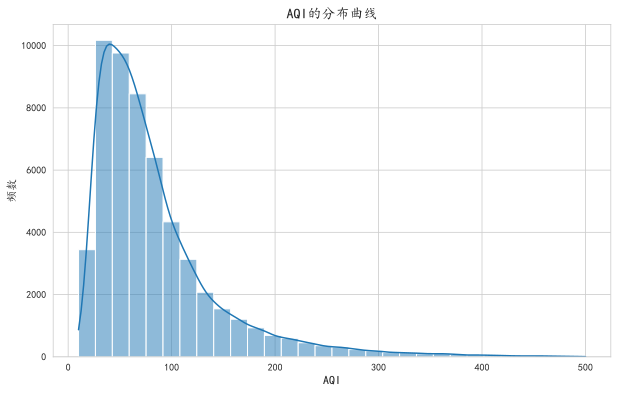

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# 提取各区的AQI数据
aqi_values = data0.iloc[:, 1:-4].values.flatten()

# 绘制AQI分布曲线
plt.figure(figsize=(10, 6))
sns.histplot(aqi_values, kde=True, bins=30)
plt.title('AQI的分布曲线', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('频数', fontsize=12)
plt.grid(True)
plt.savefig('AQI的分布曲线', dpi=1080)
plt.show()

In [22]:
data0

,date,东城区,西城区,朝阳区,海淀区,丰台区,石景山区,房山区,大兴区,通州区,...,昌平区,门头沟区,平谷区,怀柔区,密云区,延庆区,year,mean_aqi,month,season
0,20140101,88.197917,90.625000,105.333333,78.875000,101.736111,81.000000,143.500000,134.708333,119.875000,...,82.812500,18.000000,96.000000,74.166667,73.895833,94.458333,2014,91.549262,1,1
1,20140102,118.354167,112.277778,128.236111,104.048611,127.777778,92.833333,184.270833,175.902778,164.791667,...,94.895833,18.000000,97.125000,84.958333,78.375000,79.729167,2014,109.263889,1,1
2,20140103,127.979167,123.263889,146.125000,119.527778,133.097222,104.166667,169.250000,166.861111,184.291667,...,109.166667,18.000000,134.500000,113.395833,92.541667,86.729167,2014,120.544271,1,1
3,20140104,105.812500,103.611111,102.916667,104.569444,122.722222,115.375000,148.229167,120.236111,110.645833,...,86.270833,18.000000,70.708333,85.750000,70.812500,92.541667,2014,95.558160,1,1
4,20140105,172.614583,157.805556,187.430556,165.027778,173.569444,164.208333,229.083333,218.055556,218.875000,...,128.479167,18.000000,138.708333,166.833333,144.666667,135.291667,2014,159.580946,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,20231227,41.416667,47.416667,45.208333,44.520833,46.166667,48.791667,39.270833,48.243056,45.958333,...,39.645833,45.916667,44.291667,34.770833,35.354167,41.791667,2023,43.534722,12,1
3439,20231228,68.687500,68.291667,67.895833,70.833333,68.145833,69.604167,59.770833,71.656250,61.770833,...,68.937500,69.541667,52.229167,48.583333,40.041667,77.729167,2023,63.675130,12,1
3440,20231229,153.562500,153.729167,135.145833,124.312500,143.916667,132.541667,142.666667,195.062500,160.812500,...,85.479167,106.375000,111.687500,65.791667,63.458333,113.520833,2023,124.050781,12,1
3441,20231230,206.812500,209.687500,187.125000,174.770833,179.312500,182.020833,183.979167,240.059028,187.437500,...,99.791667,120.958333,161.562500,93.750000,87.375000,121.437500,2023,160.396918,12,1


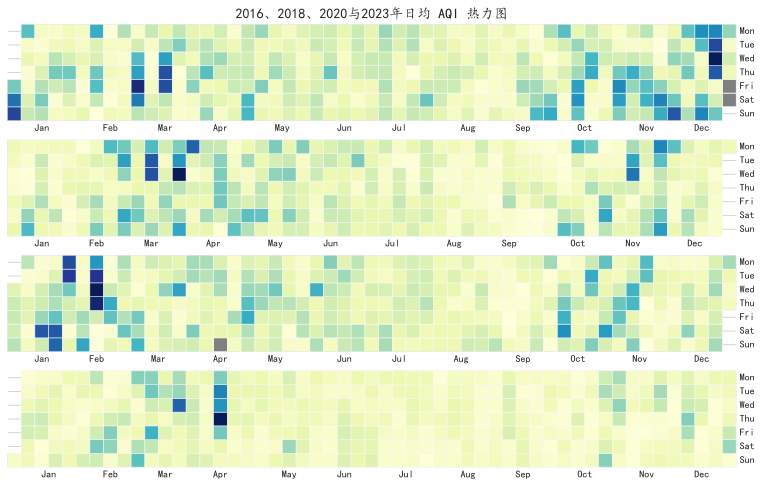

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import calmap

# Ensure 'date' column is in datetime format
data0['date'] = pd.to_datetime(data0['date'], format='%Y%m%d')

# Set 'date' as the index
data0.set_index('date', inplace=True)
    
fig,ax=plt.subplots(4,1,figsize=(16, 8))
calmap.yearplot(data0[data0.index.year == 2016]['mean_aqi'], cmap='YlGnBu', fillcolor='grey', linewidth=0.5,ax=ax[0])
ax[0].set_title(f'2016、2018、2020与2023年日均 AQI 热力图', fontsize=14)
calmap.yearplot(data0[data0.index.year == 2018]['mean_aqi'], cmap='YlGnBu', fillcolor='grey', linewidth=0.5,ax=ax[1])
calmap.yearplot(data0[data0.index.year == 2020]['mean_aqi'], cmap='YlGnBu', fillcolor='grey', linewidth=0.5,ax=ax[2])
calmap.yearplot(data0[data0.index.year == 2023]['mean_aqi'], cmap='YlGnBu', fillcolor='grey', linewidth=0.5,ax=ax[3])
plt.savefig('2016、2018、2020与2023年日均 AQI 热力图', dpi=1080)
plt.show()


In [24]:
data1=long_df
data1

,date,year,district,AQI,is_heavily_polluted
0,20140101,2014,东城区,88.197917,False
1,20140102,2014,东城区,118.354167,False
2,20140103,2014,东城区,127.979167,False
3,20140104,2014,东城区,105.812500,False
4,20140105,2014,东城区,172.614583,False
...,...,...,...,...,...
55083,20231227,2023,延庆区,41.791667,False
55084,20231228,2023,延庆区,77.729167,False
55085,20231229,2023,延庆区,113.520833,False
55086,20231230,2023,延庆区,121.437500,False


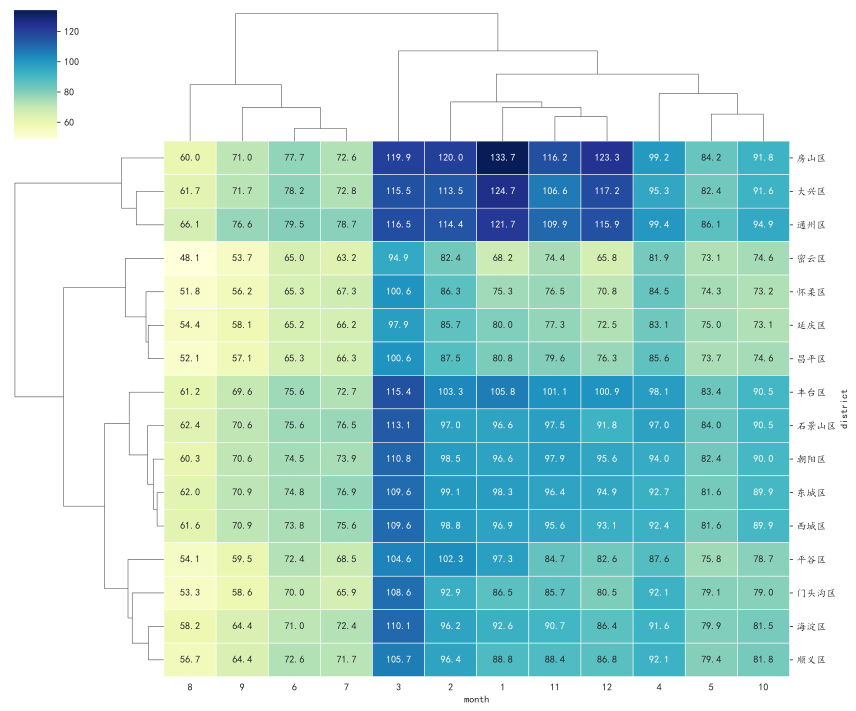

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

# Extract month from the date
data1['month'] = data1['date'].dt.month

# Group by district and month, then calculate the mean AQI
monthly_aqi = data1.groupby(['district', 'month'])['AQI'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = monthly_aqi.pivot(index='district', columns='month', values='AQI').fillna(0)

# Plot the clustered heatmap with dendrograms
sns.clustermap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={"orientation": "vertical"},figsize=(12, 10))
#plt.title('AQI关于城区和月份的聚类热力图', fontsize=14)
plt.savefig('AQI关于城区和月份的聚类热力图', dpi=1080)
plt.show()

In [26]:
dataframes2=[]
for i in range(2014,2024): 
    file_path = 'output_data/by_district/AQI/Beijing_AirQuality_'+str(i)+'AQI_hours.csv'
    df = pd.read_csv(file_path)
    dataframes2.append(df)

In [27]:
# Concatenate all dataframes in dataframes2
combined_df2 = pd.concat(dataframes2, ignore_index=True)

In [28]:
combined_df2

,date,hour,type,东城区,西城区,朝阳区,海淀区,丰台区,石景山区,房山区,大兴区,通州区,顺义区,昌平区,门头沟区,平谷区,怀柔区,密云区,延庆区
0,20140101,0,AQI,94.25,97.000000,114.000000,91.666667,100.333333,88.0,156.5,148.333333,128.0,97.5,109.0,18.0,94.0,85.0,73.5,120.5
1,20140101,1,AQI,94.00,96.666667,116.000000,90.666667,100.000000,88.0,152.5,142.666667,126.0,97.0,107.5,18.0,94.0,84.0,73.5,119.0
2,20140101,2,AQI,93.25,96.666667,117.333333,90.333333,100.000000,89.0,150.5,137.666667,124.5,95.5,105.5,18.0,95.0,83.0,73.5,116.5
3,20140101,3,AQI,92.00,97.000000,116.666667,89.666667,99.666667,89.0,148.0,133.666667,123.5,95.0,102.5,18.0,97.0,82.0,74.5,115.0
4,20140101,4,AQI,91.00,97.333333,116.666667,89.000000,99.666667,89.0,144.0,129.333333,121.0,94.0,100.0,18.0,97.0,81.0,75.0,111.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81552,20231231,19,AQI,33.50,30.500000,32.500000,37.000000,39.000000,40.5,44.5,37.500000,28.5,44.5,33.0,47.0,48.5,39.0,48.5,35.0
81553,20231231,20,AQI,37.50,35.000000,41.000000,35.500000,44.000000,45.0,45.0,37.750000,39.5,53.5,36.5,49.0,54.5,42.0,58.0,39.0
81554,20231231,21,AQI,37.50,35.000000,42.000000,40.500000,54.500000,43.5,47.5,44.250000,46.5,49.5,33.5,53.0,56.5,37.0,66.5,40.5
81555,20231231,22,AQI,37.50,40.500000,41.500000,46.000000,56.500000,50.5,55.0,49.500000,53.5,54.0,28.5,54.0,65.0,36.5,64.5,50.0


In [29]:
combined_df2['date'] = pd.to_datetime(combined_df2['date'], format='%Y%m%d')

# Extract month from the date
combined_df2['month'] = combined_df2['date'].dt.month
combined_df2['year']=combined_df2['date'].dt.year

# Define a function to map months to seasons
def map_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'season' column
combined_df2['season'] = combined_df2['month'].apply(map_season)

In [30]:
combined_df2.drop(columns=['date','type','month'], inplace=True)

In [31]:
combined_df2

,hour,东城区,西城区,朝阳区,海淀区,丰台区,石景山区,房山区,大兴区,通州区,顺义区,昌平区,门头沟区,平谷区,怀柔区,密云区,延庆区,year,season
0,0,94.25,97.000000,114.000000,91.666667,100.333333,88.0,156.5,148.333333,128.0,97.5,109.0,18.0,94.0,85.0,73.5,120.5,2014,Winter
1,1,94.00,96.666667,116.000000,90.666667,100.000000,88.0,152.5,142.666667,126.0,97.0,107.5,18.0,94.0,84.0,73.5,119.0,2014,Winter
2,2,93.25,96.666667,117.333333,90.333333,100.000000,89.0,150.5,137.666667,124.5,95.5,105.5,18.0,95.0,83.0,73.5,116.5,2014,Winter
3,3,92.00,97.000000,116.666667,89.666667,99.666667,89.0,148.0,133.666667,123.5,95.0,102.5,18.0,97.0,82.0,74.5,115.0,2014,Winter
4,4,91.00,97.333333,116.666667,89.000000,99.666667,89.0,144.0,129.333333,121.0,94.0,100.0,18.0,97.0,81.0,75.0,111.5,2014,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81552,19,33.50,30.500000,32.500000,37.000000,39.000000,40.5,44.5,37.500000,28.5,44.5,33.0,47.0,48.5,39.0,48.5,35.0,2023,Winter
81553,20,37.50,35.000000,41.000000,35.500000,44.000000,45.0,45.0,37.750000,39.5,53.5,36.5,49.0,54.5,42.0,58.0,39.0,2023,Winter
81554,21,37.50,35.000000,42.000000,40.500000,54.500000,43.5,47.5,44.250000,46.5,49.5,33.5,53.0,56.5,37.0,66.5,40.5,2023,Winter
81555,22,37.50,40.500000,41.500000,46.000000,56.500000,50.5,55.0,49.500000,53.5,54.0,28.5,54.0,65.0,36.5,64.5,50.0,2023,Winter


In [32]:
# Melt the dataframe to long format
long_df2 = combined_df2.melt(id_vars=['year', 'season', 'hour'], var_name='district', value_name='AQI')
long_df2

,year,season,hour,district,AQI
0,2014,Winter,0,东城区,94.25
1,2014,Winter,1,东城区,94.00
2,2014,Winter,2,东城区,93.25
3,2014,Winter,3,东城区,92.00
4,2014,Winter,4,东城区,91.00
...,...,...,...,...,...
1304907,2023,Winter,19,延庆区,35.00
1304908,2023,Winter,20,延庆区,39.00
1304909,2023,Winter,21,延庆区,40.50
1304910,2023,Winter,22,延庆区,50.00


In [33]:
# Group by year, season, and hour, then calculate the mean for each group
seasonal_hourly_mean_aqi = long_df2.groupby(['year', 'season', 'hour'])['AQI'].mean().reset_index()

# Display the result
seasonal_hourly_mean_aqi

,year,season,hour,AQI
0,2014,Autumn,0,125.648842
1,2014,Autumn,1,125.843995
2,2014,Autumn,2,125.818738
3,2014,Autumn,3,125.826190
4,2014,Autumn,4,125.897974
...,...,...,...,...
955,2023,Winter,19,73.546582
956,2023,Winter,20,76.264815
957,2023,Winter,21,77.651678
958,2023,Winter,22,77.517072


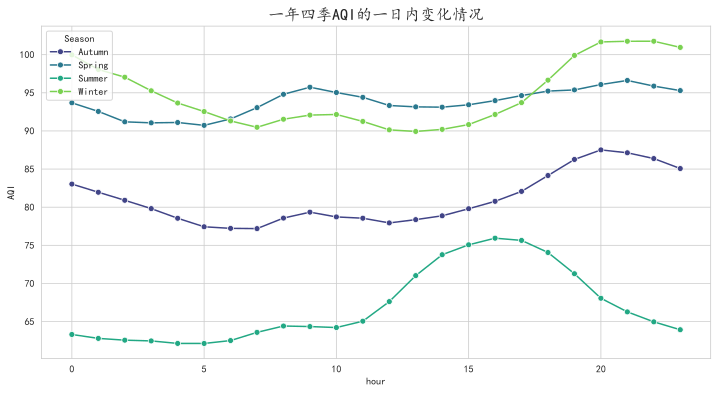

In [36]:
# Group by season and hour, then calculate the mean AQI for each group
seasonal_hourly_mean_aqi = long_df2.groupby(['season', 'hour'])['AQI'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_hourly_mean_aqi, x='hour', y='AQI', hue='season', palette='viridis', marker='o')
plt.title('一年四季AQI的一日内变化情况', fontsize=16)
plt.legend(title='Season', loc='upper left')
plt.grid(True)
plt.savefig('AQI一日内变化', dpi=1080)
plt.show()